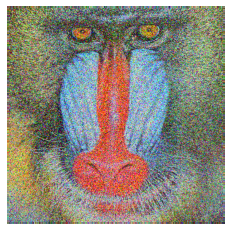

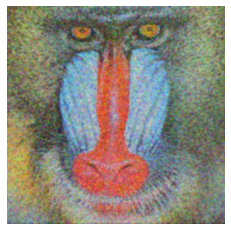

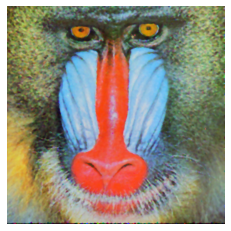

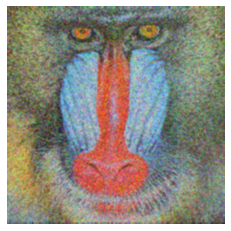

In [3]:

import os
import math
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt



def reflect_padding(input_image, size):
    for s in size:
        if s % 2 == 0:
            raise Exception("size must be odd")
    
    H, W, channel = input_image.shape #image height, width, channel
    h, w = size #filter height, width 
    h2, w2 = h//2, w//2
    
    new = np.zeros((H+2*h2,W+2*w2,channel))
    for ch in range(channel):    
        
        new[h2:H+h2,w2:W+w2,ch] = input_image[:,:,ch]
        
        #row padding
        for i in range(h2):
            new[i,:,ch] = new[h-i-1,:,ch]
            new[H+2*h2-1-i,:,ch] = new[H+2*h2+i-h,:,ch]
            
        #col padding
        for j in range(w2):    
            new[:,j,ch] = new[:,w-j-1,ch]
            new[:,W+2*w2-1-j,ch] = new[:,W+2*w2+j-w,ch]
                
    return new


def convolve(input_image, Kernel):
    for s in Kernel.shape:
        if s % 2 == 0:
            raise Exception("Kernel size must be odd")
    
    h, w = Kernel.shape #Kernel height, width 
    padded_image = reflect_padding(input_image, (h,w))
    H, W, channel = padded_image.shape #image height, width, channel
    h2, w2 = h//2, w//2
        
    
    #flip kernel
    for i in range(h2):
        Kernel[i,:], Kernel[2*h2-i,:] = Kernel[2*h2-i,:], Kernel[i,:]
    for j in range(w2):
        Kernel[:,j], Kernel[:,2*w2-j] = Kernel[:,2*w2-j], Kernel[:,j]
        
    #convolve
    new = np.zeros(input_image.shape)
    for ch in range(channel):
        for i in range(h2,H-h2):
            for j in range(w2,W-w2):
                sum = 0
                for k in range(h):
                    for l in range(w):
                        sum += padded_image[i-h2+k,j-w2+l,ch]*Kernel[k,l]
                new[i-h2,j-w2,ch] = sum
    return new


    
def median_filter(input_image, size):
    for s in size:
        if s % 2 == 0:
            raise Exception("size must be odd for median filter")
            
    h, w = size 
    padded_image = reflect_padding(input_image, (h,w))
    H, W, channel = padded_image.shape #image height, width, channel
    h2, w2 = h//2, w//2
    
    #median filtering
    new = np.zeros(input_image.shape)
    for ch in range(channel):
        for i in range(h2,H-h2):
            for j in range(w2,W-w2):
                new[i-h2,j-w2,ch] = np.median(input_image[i-h2:i+h2+1,j-w2:j+w2+1,ch])
    
    return new



def gaussian_filter(input_image, size, sigmax, sigmay):
    for s in size:
        if s % 2 == 0:
            raise Exception("size must be odd for median filter")
            
    h, w = size
    padded_image = reflect_padding(input_image, (h,w))
    h2, w2 = h//2, w//2
    
    #1D Kernel
    col = np.zeros((h,1))
    for i in range(h):
        col[i,:] = math.exp(-math.pow(i-h2,2)/(2*math.pow(sigmay,2)))/(math.sqrt(2*math.pi)*sigmay)
    row = np.zeros((1,w))
    for j in range(w):
        row[:,j] = math.exp(-math.pow(j-w2,2)/(2*math.pow(sigmax,2)))/(math.sqrt(2*math.pi)*sigmax)
   
    #normalizing
    colsum, rowsum = 0, 0
    for i in range(h):
        colsum += col[i,:]       
    for j in range(w):
        rowsum += row[:,j]    
    
    #convolution
    conv = convolve(convolve(padded_image,col/colsum),row/rowsum)  
    
    return conv


if __name__ == '__main__':
    #image = np.asarray(Image.open(os.path.join('images', 'baboon.jpeg')).convert('RGB'))
    #image = np.asarray(Image.open(os.path.join('images', 'gaussian_noise.jpeg')).convert('RGB'))
    image = np.asarray(Image.open(os.path.join('images', 'salt_and_pepper_noise.jpeg')).convert('RGB'))

    logdir = os.path.join('results', 'HW1_1')
    if not os.path.exists(logdir):
        os.makedirs(logdir)

    kernel_1 = np.ones((5,5)) / 25.
    sigmax, sigmay = 5, 5
    ret = reflect_padding(image.copy(), kernel_1.shape)
    if ret is not None:
        plt.figure()
        plt.imshow(ret.astype(np.uint8))
        plt.axis('off')      
        plt.show()

    ret = convolve(image.copy(), kernel_1)
    if ret is not None:
        plt.figure()
        plt.imshow(ret.astype(np.uint8))
        plt.axis('off')
        plt.show()

    ret = median_filter(image.copy(), kernel_1.shape)
    if ret is not None:
        plt.figure()
        plt.imshow(ret.astype(np.uint8))
        plt.axis('off')
        plt.show()

    ret = gaussian_filter(image.copy(), kernel_1.shape, sigmax, sigmay)
    if ret is not None:
        plt.figure()
        plt.imshow(ret.astype(np.uint8))
        plt.axis('off')
        plt.show()




In [2]:
!python --version

Python 3.8.11


In [ ]:
a = np.array()